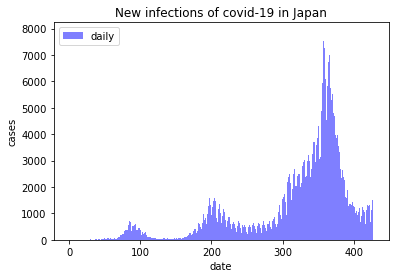

In [7]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.cm as cm
import datetime
import pandas as pd
import time

data = pd.read_csv("japan_covid.csv")
y = list(data['cases'])     #データをリストに格納する
x = [i for i in range(len(y))]
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
day = np.array(list(data['date']))

#その日までの７日間の平均データ
""" weak_f = []
for i in range(6):
    weak_f.append(y[i])
for i in range(6, len(y)):
    ave = y[i]+y[i-1]+y[i-2]+y[i-3]+y[i-4]+y[i-5]+y[i-6]
    weak_f.append(ave/7)    #誤差を減らすため。/で計算
y = weak_f """

plt.title('New infections of covid-19 in Japan')
plt.xlabel('date')
plt.ylabel('cases')
plt.bar(x, y, width=1, color='blue', alpha=0.5, linewidth=1,label ='daily')
#plt.bar(x, weak_f, width=1, color='red', alpha=0.5, linewidth=1,label ='average for every seven days period')
plt.legend()
plt.show()

In [8]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

y = y
x = [i for i in range(len(y))]

In [9]:
def func(x, *params):

    #paramsの長さでフィッティングする関数の数を判別。
    num_func = int(len(params)/3)

    #ガウス関数にそれぞれのパラメータを挿入してy_listに追加。
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y_list.append(y)

    #y_listに入っているすべてのガウス関数を重ね合わせる。
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum = y_sum + i

    #最後にバックグラウンドを追加。
    y_sum = y_sum + params[-1]

    return y_sum

In [10]:
def fit_plot(x, *params):
    num_func = int(len(params)/3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2) + params[-1]
        y_list.append(y)
    return y_list

In [11]:
#初期値のリストを作成
#[amp,ctr,wid]
guess = []
guess.append([800, 90, 10])
guess.append([1500, 200, 10])
guess.append([6500, 370, 10])

#バックグラウンドの初期値
background = 5

#初期値リストの結合
guess_total = []
for i in guess:
    guess_total.extend(i)
guess_total.append(background)

No handles with labels found to put in legend.
(array([121, 260]),)


' y_list = fit_plot(x, *popt)\nbaseline = np.zeros_like(x) + popt[-1]\nfor n,i in enumerate(y_list):\n    plt.fill_between(x, i, baseline) '

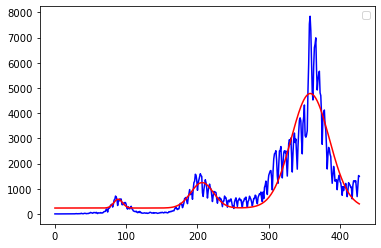

In [12]:
popt, pcov = curve_fit(func, x, y, p0=guess_total)

fit = func(x, *popt)
#plt.bar(x, y, width=1, color='blue',edgecolor='black', alpha=0.5, linewidth=0.1,label ='weakly')
plt.plot(y, 'b-')
plt.plot(fit, 'r-')
from scipy import signal
minid = signal.argrelmin(np.array(fit), order=1)
plt.legend()
print(minid)

""" y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n,i in enumerate(y_list):
    plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=0.6) """

""" y_list = fit_plot(x, *popt)
baseline = np.zeros_like(x) + popt[-1]
for n,i in enumerate(y_list):
    plt.fill_between(x, i, baseline) """

In [13]:
diff = 0
for i in range(len(y)):
    diff += (y[i]-fit[i])*(y[i]-fit[i])
print(diff)

131618291.93013842
